In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import prepare as p
import acquire as a

In [2]:
#load my csv
df = pd.read_csv('ts_superstore.csv', index_col=0)

In [4]:
p.process_dataframe(df)

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tue,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tue,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,January,Tue,308.48
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tue,197.55
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tue,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,39,31.0,706662,7,Munchies,39,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,28400029254,28400029254,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,December,Sun,279.62
2017-12-31,40,22.0,724922,7,Amys,40,Amys Light & Lean Spaghetti Italiano,0.60,42272008063,42272008063,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,December,Sun,13.20
2017-12-31,41,19.0,743182,7,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,December,Sun,106.78


In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.shape

Using your store items data:
1. Convert date column to datetime format.

In [ ]:
# remove GMT
df.sale_date = df.sale_date.str.replace('00:00:00 GMT', '')
#strip whitespace
df.sale_date = df.sale_date.str.strip()

In [ ]:
# change datatype
df.sale_date = pd.to_datetime(df.sale_date, format = "%a, %d %b %Y")

2. Plot the distribution of sale_amount and item_price.

In [ ]:
# sale amount histogram
df.sale_amount.hist();

In [ ]:
# sale amount histogram
df.item_price.hist();

3. Set the index to be the datetime variable.

In [ ]:
# set index 
df = df.set_index('sale_date')

In [ ]:
df.head()

In [ ]:
# sort index
df = df.sort_index()

4. Add a 'month' and 'day of week' column to your dataframe.

In [ ]:
# create month column
df['month'] = df.index.strftime('%B')

In [ ]:
# create dow column
df['day_of_week'] = df.index.strftime('%a')

In [ ]:
df.head()

5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price. 

In [ ]:
df['sales_total'] = df.sale_amount * df.item_price

In [ ]:
df.head()

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
import pandas as pd

def process_dataframe(df):
    # Remove GMT
    df.sale_date = df.sale_date.str.replace('00:00:00 GMT', '')
    
    # Strip whitespace
    df.sale_date = df.sale_date.str.strip()
    
    # Change datatype
    df.sale_date = pd.to_datetime(df.sale_date, format="%a, %d %b %Y")
    
    # Set index
    df = df.set_index('sale_date')
    
    # Sort index
    df = df.sort_index()
    
    # Create month column
    df['month'] = df.index.strftime('%B')
    
    # Create day of week column
    df['day_of_week'] = df.index.strftime('%a')
    
    # Create sales total from sale amount and item price
    df['sales_total'] = df.sale_amount * df.item_price
    
    return df


In [ ]:
process_dataframe(df)

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:
1. Convert date column to datetime format.

In [9]:
df = a.acquire_opsd_data()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [13]:
# lower column names
df.columns = df.columns.str.lower()

In [17]:
# change date dtype
df.date = df.date.astype('datetime64')

2.Plot the distribution of each of your variables.

date


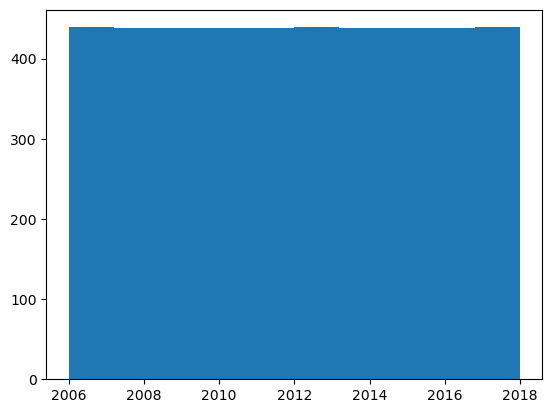

consumption


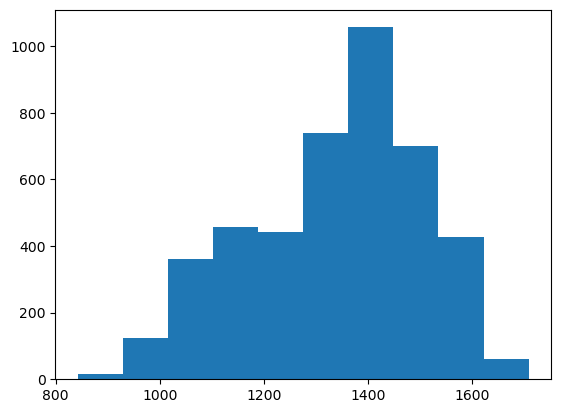

wind


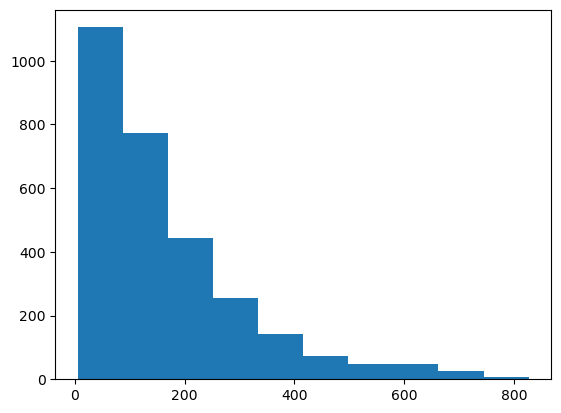

solar


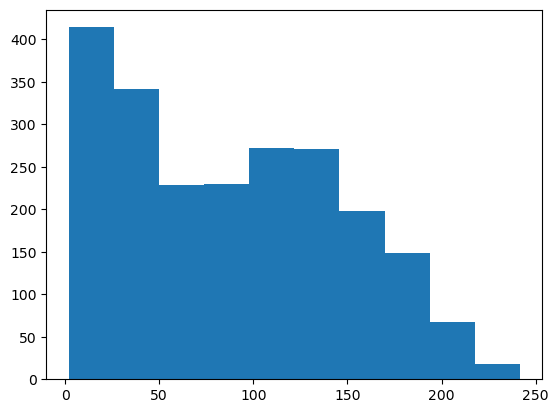

wind+solar


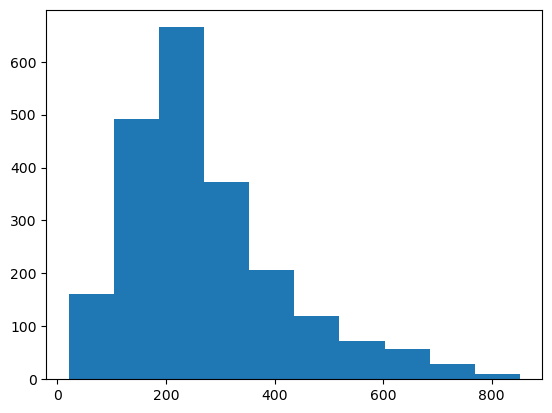

In [23]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

* date - uniformed
* consumptios- tailing to the left -norm
* wind - tailing to the right 
* solar - tailing to the right 
* wind+ solar - tailing to the right - almost normal

3. Set the index to be the datetime variable.

In [25]:
# set index 
df = df.set_index('date')

In [29]:
# sort index
df = df.sort_index()

4. Add a month and a year column to your dataframe.

In [37]:
# add month column
df['month'] = df.index.strftime('%B')

In [38]:
# add year column
df['year'] = df.index.strftime('%Y')

5. Fill any missing values.

In [42]:
# find nulls
df.isnull().sum()

consumption       0
wind           1463
solar          2195
wind+solar     2196
month             0
year              0
dtype: int64

In [82]:
df.resample('D').mean()

,consumption,wind,solar,wind+solar
date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [91]:
df[df.year == '2012'].isnull().sum()

consumption    0
wind           0
solar          0
wind+solar     0
month          0
year           0
dtype: int64

In [97]:
# function to drop a range of dates by indexes
def drop_rows_by_index_range(df, start_date, end_date):
    # Create a mask to identify rows within the specified index range
    mask = (df.index >= start_date) & (df.index <= end_date)
    
    # Drop rows using the mask
    df = df.drop(df[mask].index)
    
    return df

In [98]:
# drop nulls
df = drop_rows_by_index_range(df, '2006-01-01', '2011-12-31')

In [112]:
df.shape

(2192, 6)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2012-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  2192 non-null   float64
 1   wind         2191 non-null   float64
 2   solar        2188 non-null   float64
 3   wind+solar   2187 non-null   float64
 4   month        2192 non-null   object 
 5   year         2192 non-null   object 
dtypes: float64(4), object(2)
memory usage: 119.9+ KB


In [115]:
df[df.wind.isnull()]

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2014-03-12,1516.331,NaN,148.507,NaN,March,2014


In [135]:
def fill_nulls_using_resample(df, frequency):
    
    # Resample the DataFrame
    df_resampled = df.resample(frequency).asfreq()
    
    # Apply fill method to handle null values
    df_filled = df_resampled.fillna(method='ffill')  # Forward fill
    
    return df_filled

In [137]:
test = fill_nulls_using_resample(df, 'D')

In [138]:
test.isnull().sum()

consumption    0
wind           0
solar          0
wind+solar     0
month          0
year           0
dtype: int64